In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 500)

In [169]:
# read approved loan data from corresponsing excels
accepted = pd.read_csv('accepted_2007_to_2018Q4.csv.gz', low_memory=False, compression='gzip')



In [170]:
a_lc = accepted.copy()

In [4]:
# read rejected loan data from corresponsing excels
r_lc = pd.read_csv("rejected_2007_to_2018Q4.csv.gz", low_memory=False)

In [171]:
#check the approved loan data
a_lc.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

## EDA

In [172]:
# Check the size
a_lc.shape

(2260701, 151)

In [83]:
#Checking the rejected loan data
r_lc.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0


In [8]:
r_lc.shape

(27648741, 9)

In [9]:
a_lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [173]:
# remove not needed columns:
a_lc.drop(['all_util', 'bc_util','acc_open_past_24mths','url','revol_bal_joint','sec_app_fico_range_low','sec_app_fico_range_high',
           'sec_app_earliest_cr_line','sec_app_inq_last_6mths','sec_app_mort_acc','sec_app_open_acc','sec_app_revol_util',
           'sec_app_open_act_il','sec_app_num_rev_accts','sec_app_chargeoff_within_12_mths','sec_app_collections_12_mths_ex_med',
           'sec_app_mths_since_last_major_derog','hardship_type','hardship_reason','hardship_status','deferral_term','deferral_term',
           'hardship_amount','hardship_start_date','hardship_end_date','payment_plan_start_date','hardship_length',
           'hardship_dpd','hardship_loan_status','orig_projected_additional_accrued_interest','hardship_payoff_balance_amount',
           'hardship_last_payment_amount','debt_settlement_flag_date','settlement_status','settlement_date','settlement_amount',
           'settlement_percentage','settlement_term','funded_amnt','funded_amnt_inv','pymnt_plan','pymnt_plan','hardship_flag',
           'total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp','out_prncp',
           'out_prncp_inv','recoveries','collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
           'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 
           'total_rev_hi_lim', 'acc_open_past_24mths','bc_open_to_buy', 'chargeoff_within_12_mths', 'delinq_amnt', 
           'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 
           'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 
           'num_op_rev_tl','num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd',
           'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq','tax_liens', 'tot_hi_cred_lim',
           'total_bc_limit', 'total_il_high_credit_limit','disbursement_method',
           'debt_settlement_flag','verification_status_joint','dti_joint','annual_inc_joint',
          'mths_since_recent_bc_dlq','mths_since_recent_revol_delinq',
          'next_pymnt_d','mths_since_last_delinq','il_util','mths_since_rcnt_il',
          'open_acc_6m','total_cu_tl','inq_last_12m','open_il_24m','open_act_il','total_bal_il','open_rv_12m',
          'open_rv_24m','open_il_12m','emp_title','max_bal_bc','desc','member_id',
          'num_rev_accts', 'initial_list_status', 'application_type', 'percent_bc_gt_75'], axis=1,inplace=True)  

### Missing Data Handling

In [174]:
# Check missing values count and percent
missing= a_lc.isnull().sum().sort_values(ascending=False)
percent= (a_lc.isnull().sum()/a_lc.isnull().count()).sort_values(ascending=False)*100
missing_data= pd.concat([missing, percent],axis=1, keys=["Total", "Percent"])
missing_data.head(100)

,Total,Percent
mths_since_last_record,1901545,84.113069
mths_since_last_major_derog,1679926,74.309960
inq_fi,866162,38.313868
emp_length,146940,6.499754
avg_cur_bal,70379,3.113149
tot_cur_bal,70309,3.110053
tot_coll_amt,70309,3.110053
total_bal_ex_mort,50063,2.214490
mort_acc,50063,2.214490
title,23358,1.033219


In [175]:
# Removing the 33 rows where home ownership data was missing
a_lc = a_lc[-a_lc.home_ownership.isna()]

In [176]:
#drop significantly missing values
a_lc.drop(['mths_since_last_record','mths_since_last_major_derog'], axis=1, inplace=True)

In [177]:
# Checking the dataset for the loan data delinquest over 2 years
a_lc.loc[a_lc.delinq_2yrs.isnull() == True]

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,tot_coll_amt,tot_cur_bal,inq_fi,avg_cur_bal,mort_acc,pub_rec_bankruptcies,total_bal_ex_mort
1654329,79967,5000.0,36 months,7.43,155.38,A,A2,< 1 year,NONE,NaN,Not Verified,Aug-2007,Does not meet the credit policy. Status:Fully ...,other,Moving expenses,100xx,NY,1.00,NaN,NaN,800.0,804.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654330,79924,7000.0,36 months,7.75,218.55,A,A3,< 1 year,NONE,NaN,Not Verified,Aug-2007,Does not meet the credit policy. Status:Fully ...,other,Education,100xx,NY,1.00,NaN,NaN,800.0,804.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654339,71823,4350.0,36 months,8.07,136.45,A,A4,< 1 year,RENT,120000.0,Not Verified,Aug-2007,Does not meet the credit policy. Status:Fully ...,other,Paying medical bill,024xx,MA,4.00,NaN,NaN,740.0,744.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654352,72197,3900.0,36 months,9.33,124.62,B,B3,< 1 year,RENT,98000.0,Not Verified,Aug-2007,Does not meet the credit policy. Status:Fully ...,other,Moving to Florida,100xx,NY,10.00,NaN,NaN,705.0,709.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654360,79893,6700.0,36 months,7.75,209.18,A,A3,< 1 year,NONE,NaN,Not Verified,Jul-2007,Does not meet the credit policy. Status:Fully ...,other,Moving expenses and security deposit,100xx,NY,1.00,NaN,NaN,800.0,804.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654363,73003,3200.0,36 months,9.96,103.20,B,B5,< 1 year,MORTGAGE,150000.0,Not Verified,Jul-2007,Does not meet the credit policy. Status:Fully ...,other,New Bathroom,019xx,MA,10.00,NaN,NaN,690.0,694.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654374,72819,7200.0,36 months,10.28,164.42,C,C1,< 1 year,RENT,95000.0,Not Verified,Jul-2007,Does not meet the credit policy. Status:Fully ...,other,Consolidate 2 high-interest rate loans,100xx,NY,10.00,NaN,NaN,700.0,704.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654389,91023,1900.0,36 months,9.64,61.00,B,B4,1 year,MORTGAGE,100000.0,Not Verified,Jul-2007,Does not meet the credit policy. Status:Fully ...,debt_consolidation,Consolidate credit cards,333xx,FL,10.00,NaN,NaN,705.0,709.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654394,85961,1200.0,36 months,9.01,38.17,B,B2,< 1 year,RENT,36000.0,Not Verified,Jun-2007,Does not meet the credit policy. Status:Fully ...,other,College Debt Consolidation,787xx,TX,3.27,NaN,NaN,705.0,709.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654395,85818,5000.0,36 months,11.22,164.23,C,C4,< 1 year,RENT,28000.0,Not Verified,Jun-2007,Does not meet the credit policy. Status:Fully ...,other,Credit Card,078xx,NJ,3.51,NaN,NaN,670.0,674.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
# Checking the dataset how many records are having total account blank
a_lc.loc[a_lc.total_acc.isnull() == True]

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,tot_coll_amt,tot_cur_bal,inq_fi,avg_cur_bal,mort_acc,pub_rec_bankruptcies,total_bal_ex_mort
1654329,79967,5000.0,36 months,7.43,155.38,A,A2,< 1 year,NONE,NaN,Not Verified,Aug-2007,Does not meet the credit policy. Status:Fully ...,other,Moving expenses,100xx,NY,1.00,NaN,NaN,800.0,804.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654330,79924,7000.0,36 months,7.75,218.55,A,A3,< 1 year,NONE,NaN,Not Verified,Aug-2007,Does not meet the credit policy. Status:Fully ...,other,Education,100xx,NY,1.00,NaN,NaN,800.0,804.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654339,71823,4350.0,36 months,8.07,136.45,A,A4,< 1 year,RENT,120000.0,Not Verified,Aug-2007,Does not meet the credit policy. Status:Fully ...,other,Paying medical bill,024xx,MA,4.00,NaN,NaN,740.0,744.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654352,72197,3900.0,36 months,9.33,124.62,B,B3,< 1 year,RENT,98000.0,Not Verified,Aug-2007,Does not meet the credit policy. Status:Fully ...,other,Moving to Florida,100xx,NY,10.00,NaN,NaN,705.0,709.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654360,79893,6700.0,36 months,7.75,209.18,A,A3,< 1 year,NONE,NaN,Not Verified,Jul-2007,Does not meet the credit policy. Status:Fully ...,other,Moving expenses and security deposit,100xx,NY,1.00,NaN,NaN,800.0,804.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654363,73003,3200.0,36 months,9.96,103.20,B,B5,< 1 year,MORTGAGE,150000.0,Not Verified,Jul-2007,Does not meet the credit policy. Status:Fully ...,other,New Bathroom,019xx,MA,10.00,NaN,NaN,690.0,694.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654374,72819,7200.0,36 months,10.28,164.42,C,C1,< 1 year,RENT,95000.0,Not Verified,Jul-2007,Does not meet the credit policy. Status:Fully ...,other,Consolidate 2 high-interest rate loans,100xx,NY,10.00,NaN,NaN,700.0,704.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654389,91023,1900.0,36 months,9.64,61.00,B,B4,1 year,MORTGAGE,100000.0,Not Verified,Jul-2007,Does not meet the credit policy. Status:Fully ...,debt_consolidation,Consolidate credit cards,333xx,FL,10.00,NaN,NaN,705.0,709.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654394,85961,1200.0,36 months,9.01,38.17,B,B2,< 1 year,RENT,36000.0,Not Verified,Jun-2007,Does not meet the credit policy. Status:Fully ...,other,College Debt Consolidation,787xx,TX,3.27,NaN,NaN,705.0,709.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654395,85818,5000.0,36 months,11.22,164.23,C,C4,< 1 year,RENT,28000.0,Not Verified,Jun-2007,Does not meet the credit policy. Status:Fully ...,other,Credit Card,078xx,NJ,3.51,NaN,NaN,670.0,674.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
# Missing value imputation

# Filling the mode in place of the missing values
a_lc["inq_fi"].value_counts()
a_lc["inq_fi"]= a_lc["inq_fi"].fillna(a_lc["inq_fi"].mode()[0])
a_lc["emp_length"]= a_lc["emp_length"].fillna(a_lc["emp_length"].mode()[0])
a_lc["mort_acc"]= a_lc["mort_acc"].fillna(a_lc["mort_acc"].mode()[0])
a_lc["title"]= a_lc["title"].fillna(a_lc["title"].mode()[0])
a_lc["pub_rec_bankruptcies"]= a_lc["pub_rec_bankruptcies"].fillna(a_lc["pub_rec_bankruptcies"].mode()[0])
a_lc["zip_code"]= a_lc["zip_code"].fillna(a_lc["zip_code"].mode()[0])
a_lc["int_rate"]= a_lc["int_rate"].fillna(a_lc["int_rate"].mode()[0])
a_lc["open_acc"]= a_lc["open_acc"].fillna(a_lc["open_acc"].mode()[0])
a_lc["verification_status"]= a_lc["verification_status"].fillna(a_lc["verification_status"].mode()[0])
a_lc["term"]= a_lc["term"].fillna(a_lc["term"].mode()[0])
a_lc["grade"]= a_lc["grade"].fillna(a_lc["grade"].mode()[0])
a_lc["sub_grade"]= a_lc["sub_grade"].fillna(a_lc["sub_grade"].mode()[0])
a_lc["home_ownership"]= a_lc["home_ownership"].fillna(a_lc["home_ownership"].mode()[0])
a_lc["loan_status"]= a_lc["loan_status"].fillna(a_lc["loan_status"].mode()[0])
a_lc["purpose"]= a_lc["purpose"].fillna(a_lc["purpose"].mode()[0])
a_lc["addr_state"]= a_lc["addr_state"].fillna(a_lc["addr_state"].mode()[0])
a_lc["issue_d"]= a_lc["issue_d"].fillna(a_lc["issue_d"].mode()[0])
a_lc["earliest_cr_line"] = a_lc["earliest_cr_line"].fillna(a_lc["earliest_cr_line"].mode()[0])


In [180]:
# Missing value imputation

# Filling the median in place of the missing values
a_lc["avg_cur_bal"].value_counts()
a_lc["avg_cur_bal"]= a_lc["avg_cur_bal"].fillna(a_lc["avg_cur_bal"].median())
a_lc["tot_cur_bal"]= a_lc["tot_cur_bal"].fillna(a_lc["tot_cur_bal"].median())
a_lc["total_bal_ex_mort"]= a_lc["total_bal_ex_mort"].fillna(a_lc["total_bal_ex_mort"].median())
a_lc["dti"]= a_lc["dti"].fillna(a_lc["dti"].median())
a_lc["revol_util"]=a_lc["revol_util"].fillna(a_lc["revol_util"].median())
a_lc["total_acc"]= a_lc["total_acc"].fillna(a_lc["total_acc"].median())
a_lc["annual_inc"]= a_lc["annual_inc"].fillna(a_lc["annual_inc"].median())
a_lc["inq_last_6mths"] = a_lc["inq_last_6mths"].fillna(a_lc["inq_last_6mths"].median())
a_lc["delinq_2yrs"] = a_lc["delinq_2yrs"].fillna(a_lc["delinq_2yrs"].median())
a_lc["open_acc"] = a_lc["open_acc"].fillna(a_lc["open_acc"].median())
a_lc["pub_rec"] = a_lc["pub_rec"].fillna(a_lc["pub_rec"].median())
a_lc["tot_coll_amt"]= a_lc["tot_coll_amt"].fillna(a_lc["tot_coll_amt"].median())
a_lc["loan_amnt"]= a_lc["loan_amnt"].fillna(a_lc["loan_amnt"].median())
a_lc["fico_range_low"]= a_lc["fico_range_low"].fillna(a_lc["fico_range_low"].median())
a_lc["fico_range_high"]= a_lc["fico_range_high"].fillna(a_lc["fico_range_high"].median())


In [181]:
# Re-Check missing values count and percent - No more missing data
missing= a_lc.isnull().sum().sort_values(ascending=False)
percent= (a_lc.isnull().sum()/a_lc.isnull().count()).sort_values(ascending=False)*100
missing_data= pd.concat([missing, percent],axis=1, keys=["Total", "Percent"])
missing_data

,Total,Percent
total_bal_ex_mort,0,0.0
home_ownership,0,0.0
title,0,0.0
purpose,0,0.0
loan_status,0,0.0
issue_d,0,0.0
verification_status,0,0.0
annual_inc,0,0.0
emp_length,0,0.0
addr_state,0,0.0


### Data Vizualisation and Analysis

we assume that the model will be used when one begins to apply for the loan. 
Therefore, there should be no information about user's payment behaviors.

In [182]:
# Loan counts group by Loan Status
ls = a_lc.groupby('loan_status').count()['loan_amnt']
ls

loan_status
Charged Off                                             268559
Current                                                 878317
Default                                                     40
Does not meet the credit policy. Status:Charged Off        761
Does not meet the credit policy. Status:Fully Paid        1988
Fully Paid                                             1076751
In Grace Period                                           8436
Late (16-30 days)                                         4349
Late (31-120 days)                                       21467
Name: loan_amnt, dtype: int64

Text(0, 0.5, 'Loan Amount')

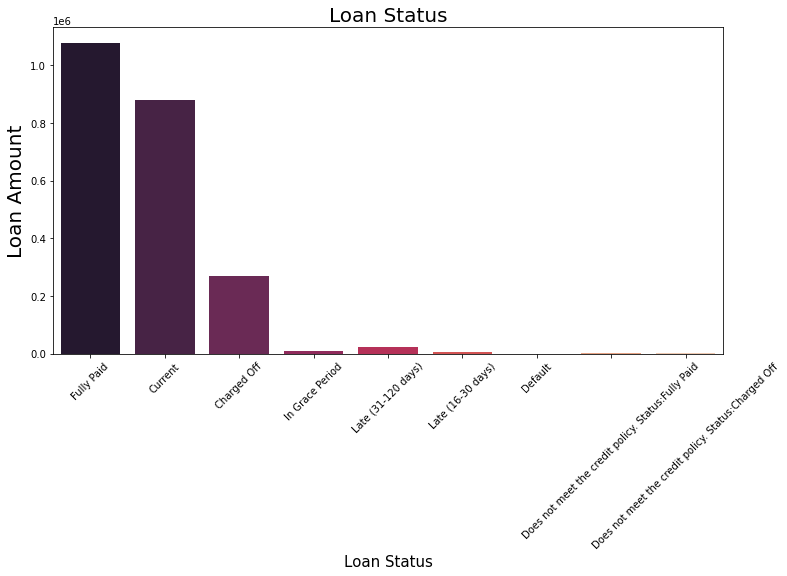

In [183]:
# Loan Status
plt.figure(figsize = (12,6))
g = sns.countplot(x="loan_status",data=a_lc,
                  palette="rocket")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Loan Status", fontsize=20)
g.set_xlabel("Loan Status", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=20)

In [184]:
# check the current loans
current = a_lc.loc[a_lc.loan_status == 'Current']
current

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,tot_coll_amt,tot_cur_bal,inq_fi,avg_cur_bal,mort_acc,pub_rec_bankruptcies,total_bal_ex_mort
3,66310712,35000.0,60 months,14.85,829.90,C,C5,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,13.0,0.0,7802.0,11.6,17.0,0.0,301500.0,0.0,23192.0,1.0,0.0,52226.0
10,68356421,22400.0,60 months,12.88,508.30,C,C2,6 years,MORTGAGE,95000.0,Not Verified,Dec-2015,Current,debt_consolidation,Debt consolidation,290xx,SC,22.98,0.0,Apr-1995,710.0,714.0,0.0,16.0,0.0,13028.0,32.7,35.0,0.0,376218.0,1.0,23514.0,5.0,0.0,184356.0
11,68426545,16000.0,60 months,12.88,363.07,C,C2,1 year,MORTGAGE,70000.0,Not Verified,Dec-2015,Current,debt_consolidation,Debt consolidation,786xx,TX,26.40,0.0,Feb-1988,720.0,724.0,0.0,13.0,0.0,28705.0,56.3,29.0,0.0,265836.0,0.0,24167.0,2.0,0.0,62407.0
18,68506798,23000.0,60 months,8.49,471.77,B,B1,5 years,RENT,64000.0,Not Verified,Dec-2015,Current,credit_card,Credit card refinancing,117xx,NY,18.28,0.0,Sep-2001,700.0,704.0,0.0,21.0,0.0,24940.0,52.7,33.0,0.0,63886.0,0.0,3549.0,0.0,0.0,63886.0
34,68537655,16800.0,60 months,12.88,381.23,C,C2,10+ years,MORTGAGE,118000.0,Not Verified,Dec-2015,Current,debt_consolidation,Debt consolidation,636xx,MO,34.29,0.0,Jun-1997,680.0,684.0,0.0,11.0,1.0,7849.0,24.1,46.0,0.0,314793.0,2.0,28618.0,4.0,0.0,75808.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260693,89955820,24000.0,60 months,10.49,515.74,B,B3,4 years,OWN,125000.0,Not Verified,Oct-2016,Current,credit_card,Credit card refinancing,967xx,HI,10.98,0.0,Feb-2001,725.0,729.0,0.0,15.0,2.0,22448.0,22.4,22.0,0.0,31320.0,0.0,2088.0,0.0,0.0,31320.0
2260694,89885898,24000.0,60 months,12.79,543.50,C,C1,7 years,MORTGAGE,95000.0,Source Verified,Oct-2016,Current,home_improvement,Home improvement,356xx,AL,19.61,0.0,Dec-1999,665.0,669.0,0.0,5.0,0.0,49431.0,84.4,54.0,0.0,104422.0,1.0,26106.0,0.0,0.0,104422.0
2260695,88977788,24000.0,60 months,10.49,515.74,B,B3,10+ years,MORTGAGE,108000.0,Not Verified,Oct-2016,Current,debt_consolidation,Debt consolidation,840xx,UT,34.94,0.0,Feb-1991,695.0,699.0,1.0,24.0,1.0,21665.0,39.0,58.0,0.0,140118.0,1.0,6369.0,4.0,0.0,140118.0
2260696,88985880,40000.0,60 months,10.49,859.56,B,B3,9 years,MORTGAGE,227000.0,Verified,Oct-2016,Current,debt_consolidation,Debt consolidation,907xx,CA,12.75,7.0,Feb-1995,705.0,709.0,1.0,5.0,0.0,8633.0,64.9,37.0,0.0,28398.0,3.0,5680.0,3.0,0.0,28398.0


In [185]:
# Excluding the current loans from dataset
a_lc = a_lc[a_lc.loan_status != 'Current']
a_lc.shape

(1382351, 35)

In [186]:
# Creating loan_category as an intermediate feature for vizualization purpose
a_lc["loan_category"] = np.where((a_lc.loan_status == 'Fully Paid') |
                        (a_lc.loan_status == 'Does not meet the credit policy. Status:Fully Paid'), 'Fully Paid', 'Charged Off')

In [188]:
# Excluding Grace period and late payment statuses as those are ambiguous to predict
a_lc = a_lc.loc[a_lc['loan_status'].isin(['Fully Paid','Charged Off', 
                                           'Does not meet the credit policy. Status:Fully Paid',
                                          'Does not meet the credit policy. Status:Charged Off',
                                          'Default'])]


In [189]:
# Sorting the data set by Issue Date
a_lc = a_lc.sort_values(by='issue_d')
a_lc

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,tot_coll_amt,tot_cur_bal,inq_fi,avg_cur_bal,mort_acc,pub_rec_bankruptcies,total_bal_ex_mort,loan_category
1653655,304384,20000.0,36 months,11.97,664.00,C,C4,1 year,MORTGAGE,90012.0,Verified,Apr-2008,Does not meet the credit policy. Status:Fully ...,other,Small Business Expanding,660xx,KS,18.96,0.0,Mar-2001,705.0,709.0,7.0,17.0,0.0,17212.0,39.7,31.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,Fully Paid
1650776,317597,4500.0,36 months,11.97,149.40,C,C4,10+ years,MORTGAGE,115200.0,Not Verified,Apr-2008,Fully Paid,home_improvement,Home Project,207xx,MD,15.49,1.0,Feb-1994,670.0,674.0,1.0,10.0,0.0,22625.0,86.4,30.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,Fully Paid
1650777,320231,10000.0,36 months,10.08,323.05,B,B3,2 years,RENT,35665.0,Not Verified,Apr-2008,Fully Paid,debt_consolidation,"Help Me ""Stick It"" to the Big Banks",441xx,OH,21.57,0.0,Nov-1994,745.0,749.0,0.0,17.0,0.0,16973.0,26.4,20.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,Fully Paid
1650778,319964,5700.0,36 months,10.39,184.97,B,B4,1 year,RENT,36000.0,Not Verified,Apr-2008,Fully Paid,debt_consolidation,Bill payment,017xx,MA,9.57,0.0,Aug-2001,695.0,699.0,0.0,8.0,0.0,6342.0,74.4,15.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,Fully Paid
1650779,319299,4075.0,36 months,8.32,128.30,A,A4,< 1 year,RENT,19200.0,Not Verified,Apr-2008,Fully Paid,debt_consolidation,Help with credit cards,968xx,HI,1.25,0.0,Oct-2002,740.0,744.0,0.0,4.0,0.0,296.0,2.0,5.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764308,140621163,5000.0,36 months,14.47,172.04,C,C2,10+ years,RENT,48690.0,Source Verified,Sep-2018,Fully Paid,credit_card,Credit card refinancing,342xx,FL,23.15,0.0,Dec-2009,715.0,719.0,1.0,6.0,0.0,3874.0,55.3,19.0,0.0,21522.0,4.0,3587.0,0.0,0.0,21522.0,Fully Paid
764315,140599114,14000.0,60 months,10.47,300.71,B,B2,9 years,RENT,39000.0,Verified,Sep-2018,Fully Paid,debt_consolidation,Debt consolidation,395xx,MS,18.52,0.0,Jan-2010,760.0,764.0,0.0,4.0,0.0,1251.0,22.7,11.0,0.0,13496.0,0.0,3374.0,0.0,0.0,13496.0,Fully Paid
764343,140557518,35000.0,36 months,12.73,1174.75,B,B5,10+ years,MORTGAGE,130000.0,Verified,Sep-2018,Fully Paid,debt_consolidation,Debt consolidation,117xx,NY,10.36,1.0,Mar-1999,690.0,694.0,0.0,4.0,0.0,11258.0,86.6,21.0,0.0,344348.0,0.0,86087.0,4.0,0.0,17934.0,Fully Paid
764796,140579566,20000.0,36 months,6.67,614.53,A,A2,10+ years,MORTGAGE,300000.0,Not Verified,Sep-2018,Fully Paid,debt_consolidation,Debt consolidation,208xx,MD,4.87,0.0,Jul-2002,750.0,754.0,1.0,10.0,0.0,35515.0,39.9,33.0,0.0,387816.0,1.0,38782.0,2.0,0.0,54917.0,Fully Paid


In [190]:
# Cleaning the data to keep the numeric values
a_lc['home_ownership'] = a_lc['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')
a_lc['term'] = a_lc['term'].replace({'months':''}, regex = True)
a_lc['emp_length'] = a_lc['emp_length'].replace('< 1 year', '0 years')
a_lc['emp_length'] = a_lc['emp_length'].replace('10+ years', '10 years')
a_lc['emp_length'] = a_lc['emp_length'].replace({'year':'', 's':'', '\+':''}, regex = True)

# a_lc[['Profit', 'Sales']] = orders[['Profit', 'Sales']].apply(pd.to_numeric)


In [191]:
# Checking loan category counts
a_lc['loan_category'].value_counts()

Fully Paid     1078739
Charged Off     269360
Name: loan_category, dtype: int64

In [192]:
a_lc.columns

Index(['id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'tot_coll_amt',
       'tot_cur_bal', 'inq_fi', 'avg_cur_bal', 'mort_acc',
       'pub_rec_bankruptcies', 'total_bal_ex_mort', 'loan_category'],
      dtype='object')

In [193]:
numeric_var = ['loan_amnt', 'int_rate', 'installment', 'delinq_2yrs','annual_inc','dti', 
               'fico_range_low', 'fico_range_high', 'open_acc', 'total_acc', 'pub_rec', 'revol_bal', 'revol_util',
               'tot_coll_amt', 'tot_cur_bal', 'inq_last_6mths', 'inq_fi', 'avg_cur_bal', 'mort_acc',
               'pub_rec_bankruptcies', 'total_bal_ex_mort']

ordinal_var = ['term', 'grade', 'sub_grade', 'emp_length', 'verification_status']

nominal_var = ['home_ownership','purpose', 'title', 'zip_code', 'addr_state']

other = ['id', 'issue_d','loan_category', 'loan_status', 'earliest_cr_line']


In [194]:
def numeric_plot(v):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    sns.distplot(a_lc.loc[a_lc[v].notnull(), v], kde=False, ax=ax1)
    ax1.set_title(f'Loan Status vs {v}')
    ax1.set_xlabel(v)
    ax1.set_ylabel('Count')
    
    sns.boxplot(x='loan_category', y=v, data=a_lc, ax=ax2)
    ax2.set_ylabel('')
    ax2.set_title(v + ' by Loan Status')
    ax2.set_xlabel(v)
    
    plt.tight_layout()
    
    

In [195]:
a_lc.groupby('term')['loan_category'].value_counts().loc[:,'Charged Off']

term
 36     163926
 60     105434
Name: loan_category, dtype: int64

In [196]:
def categorical_plot(v):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    sns.countplot(a_lc[v], palette = 'rocket', ax=ax1)
    ax1.set_title(f'Loan Status vs {v}')
    ax1.set_xlabel(v)
    ax1.set_ylabel('Count')
    
    
    good_rates = a_lc.groupby(v)['loan_category'].value_counts(normalize=True).loc[:,'Fully Paid']
    sns.barplot(x=good_rates.index, y=good_rates.values, palette = 'rocket', ax=ax2)
    ax2.set_ylabel('Fraction of Good Loans')
    ax2.set_title('Fully Paid Rate by ' + v)
    ax2.set_xlabel(v)
    ax2.set_ylim(0,1)
    
    
    plt.tight_layout()
#     order=sorted(a_lc[v].unique())

C:\Users\Chait\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Chait\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Chait\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

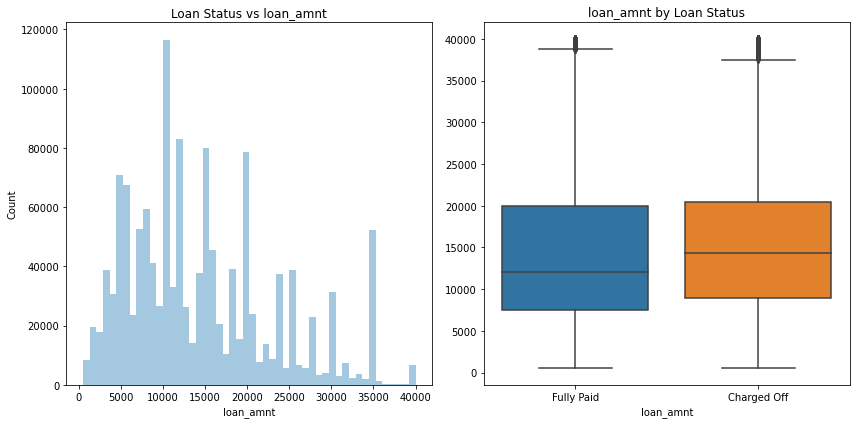

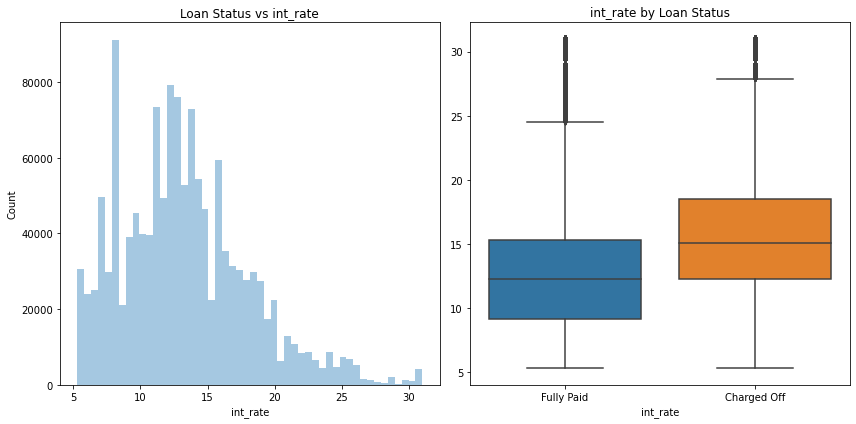

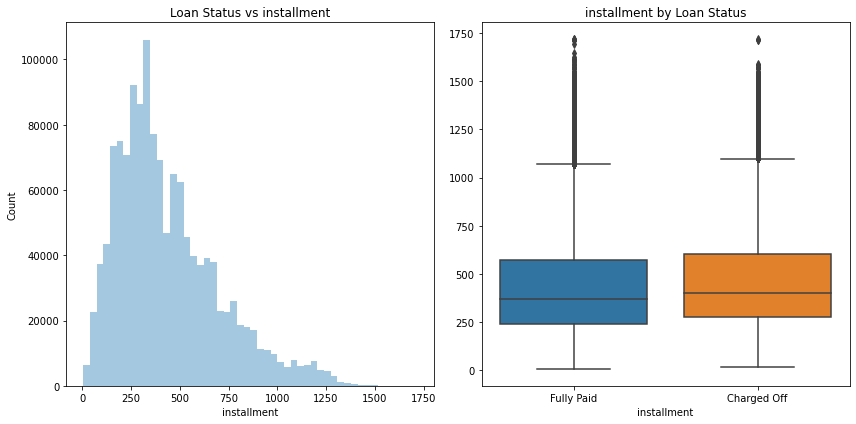

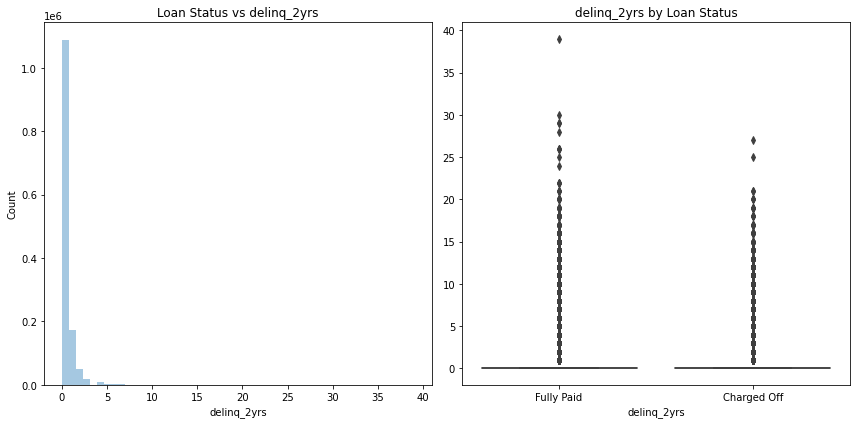

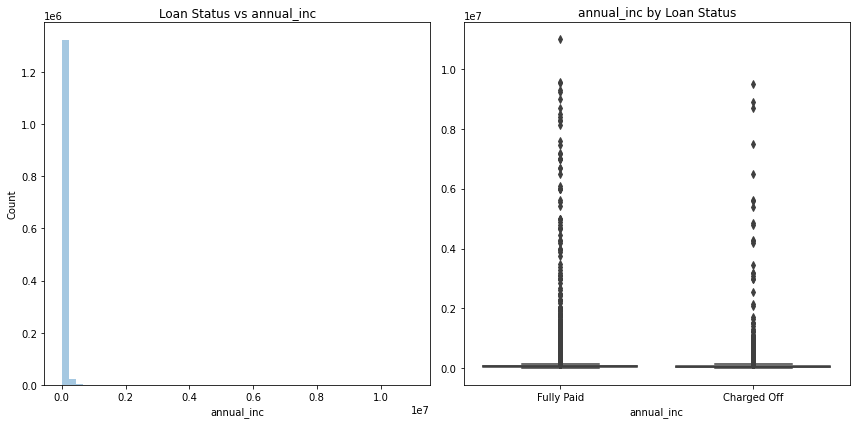

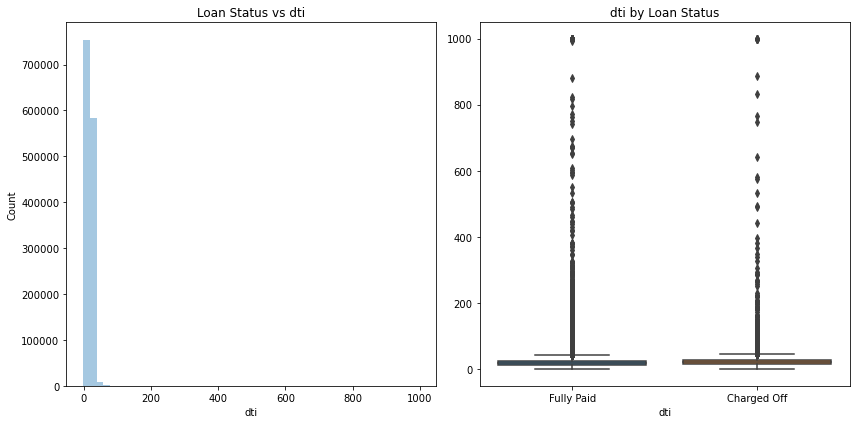

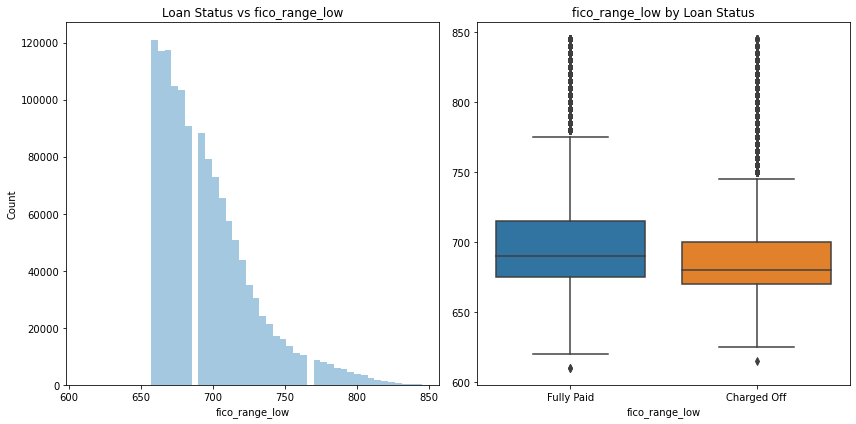

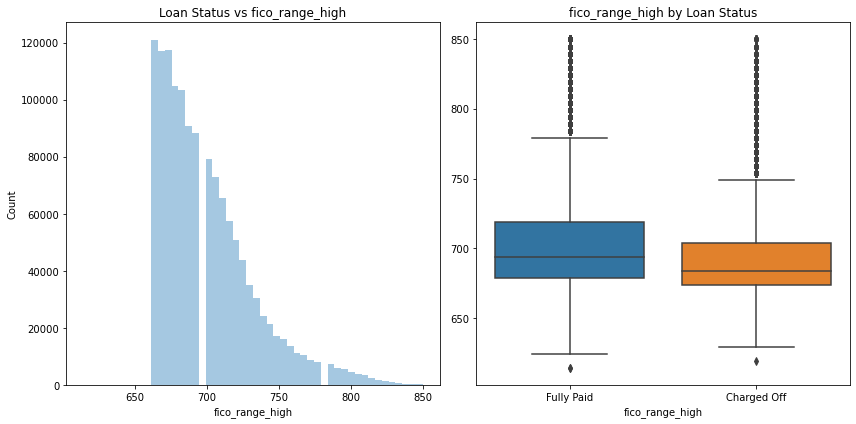

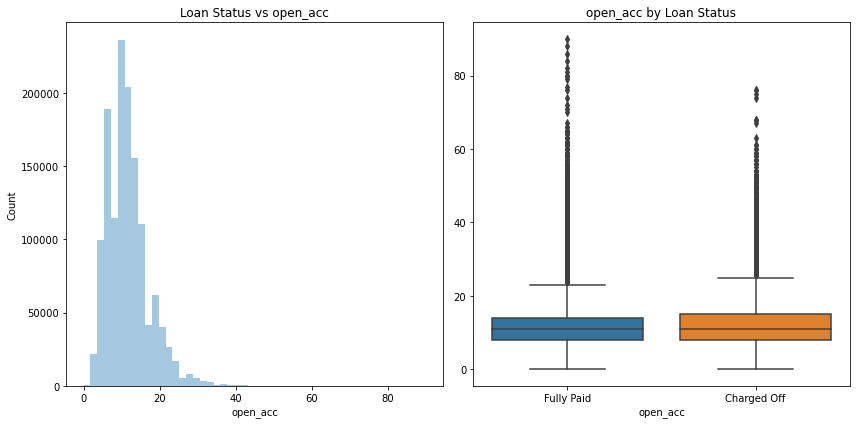

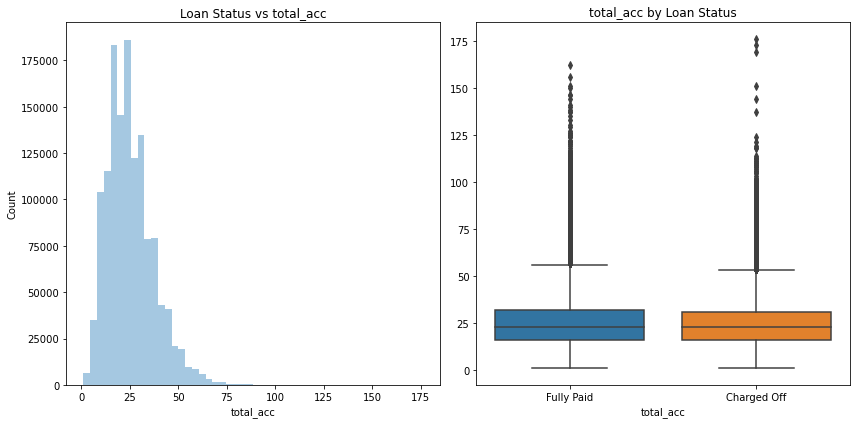

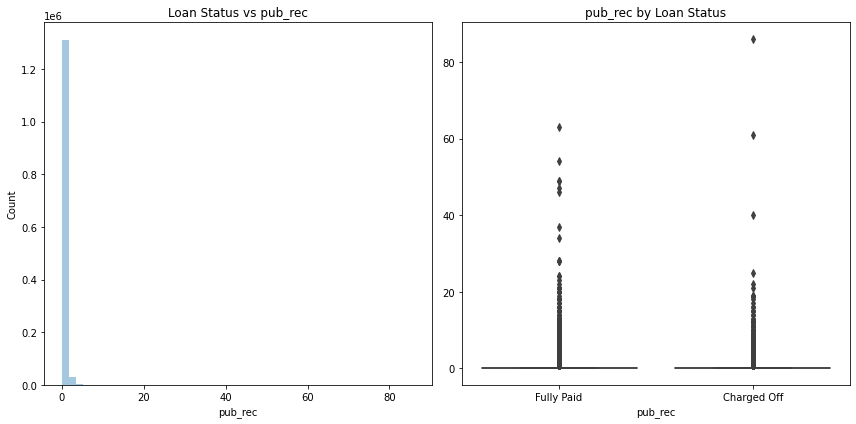

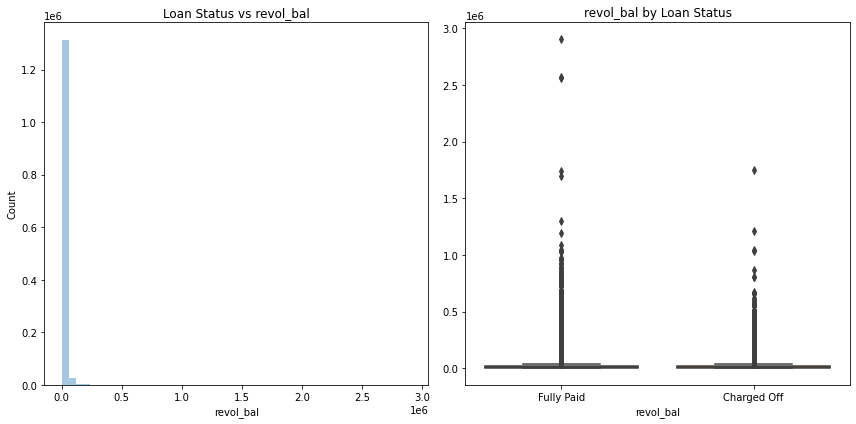

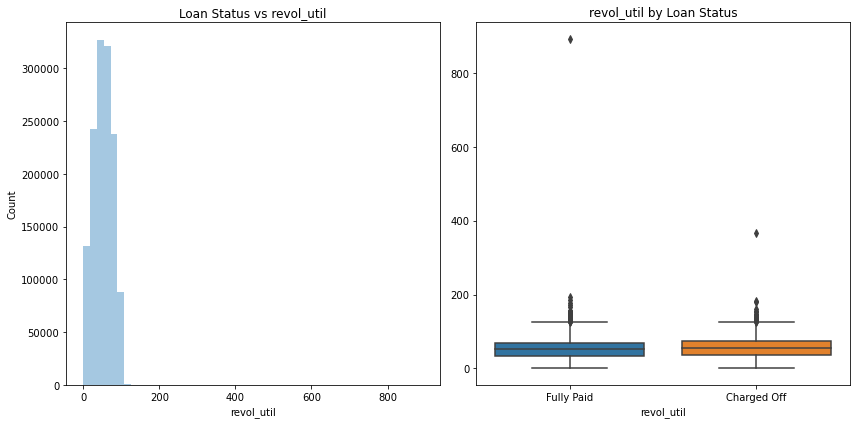

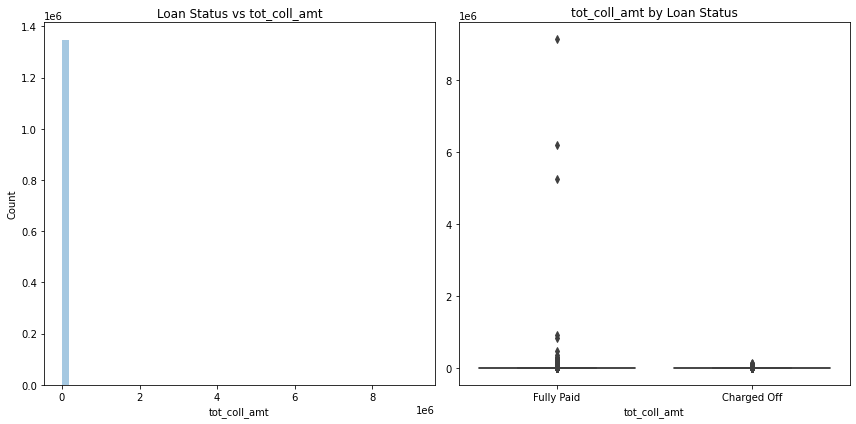

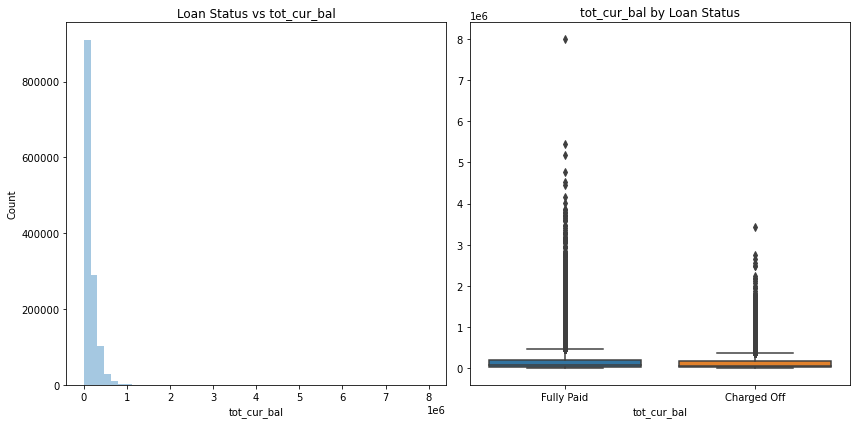

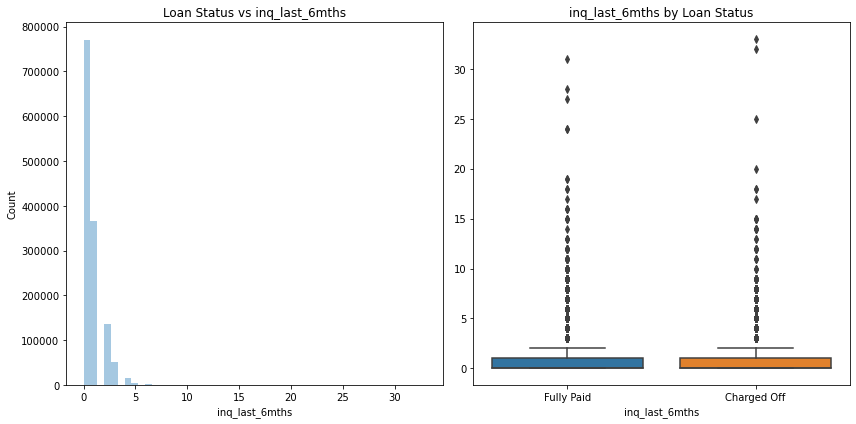

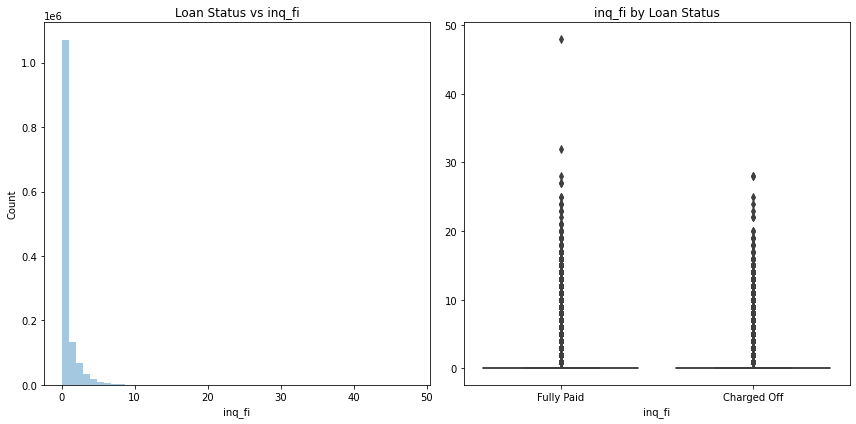

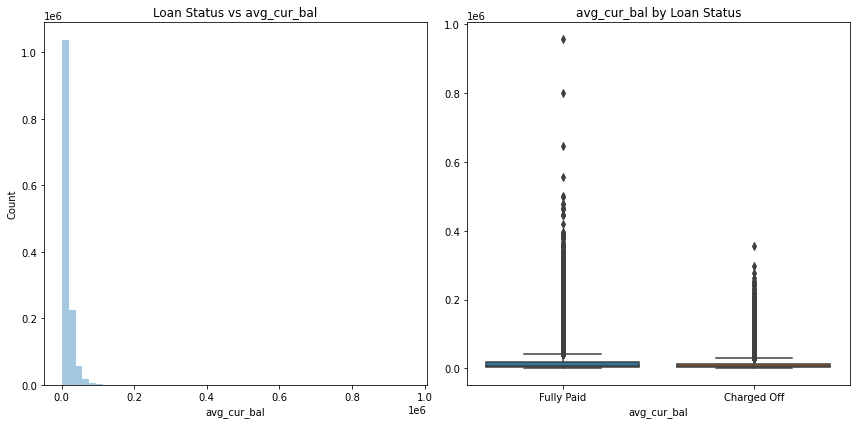

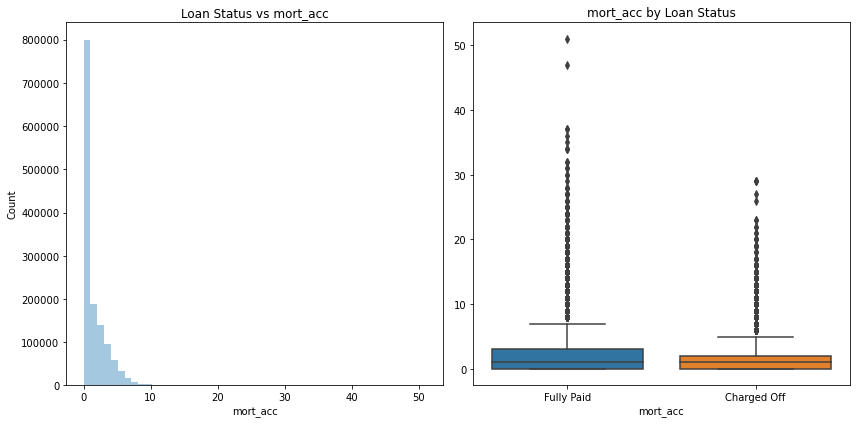

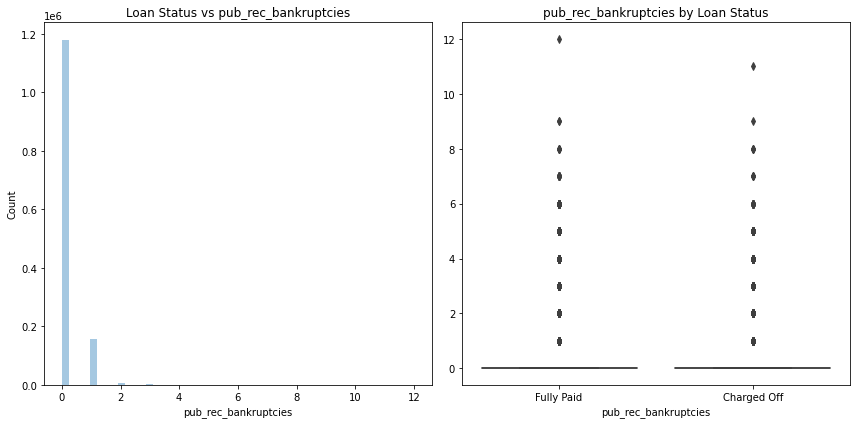

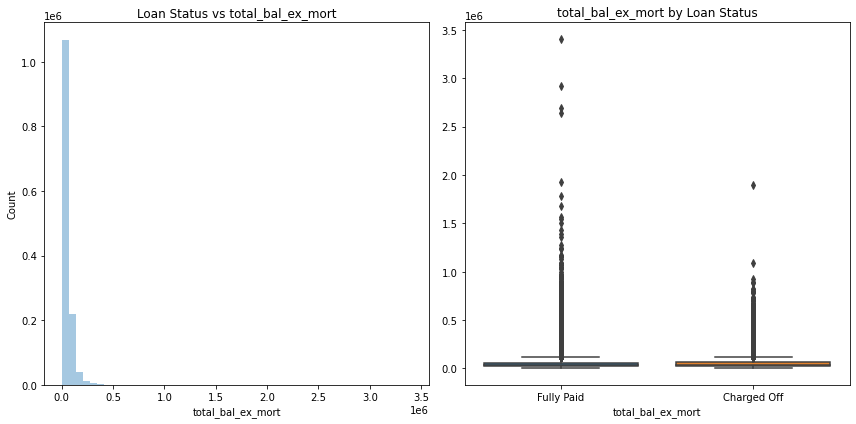

In [112]:
for v in numeric_var:
    numeric_plot(v)

C:\Users\Chait\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Chait\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Chait\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Chait\anaconda3\lib\si

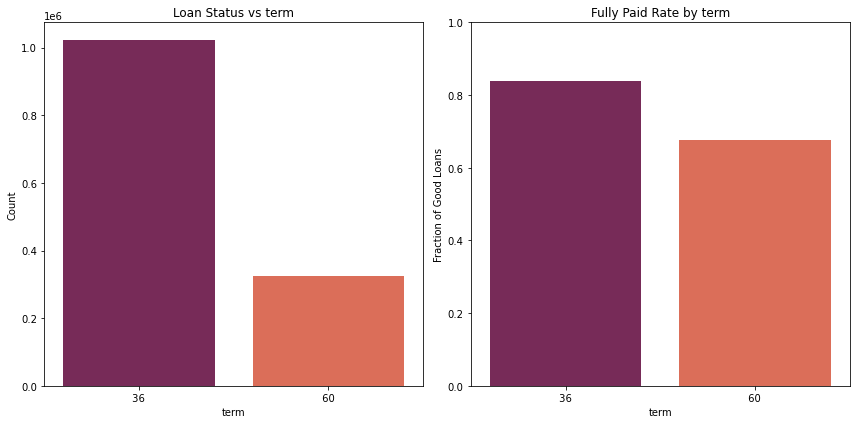

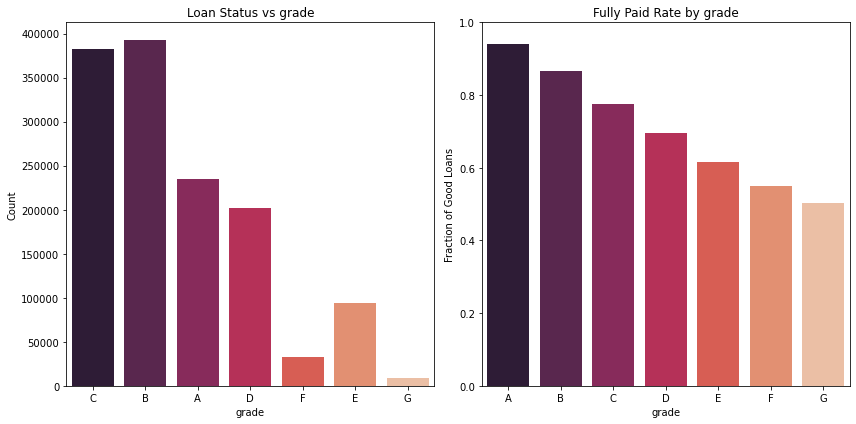

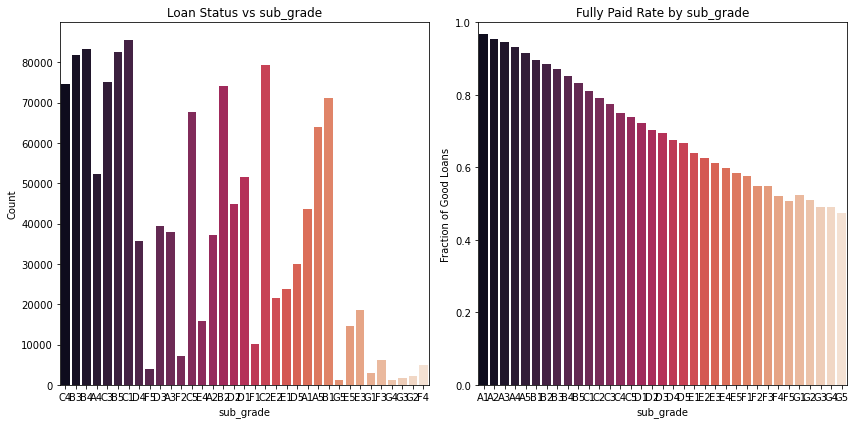

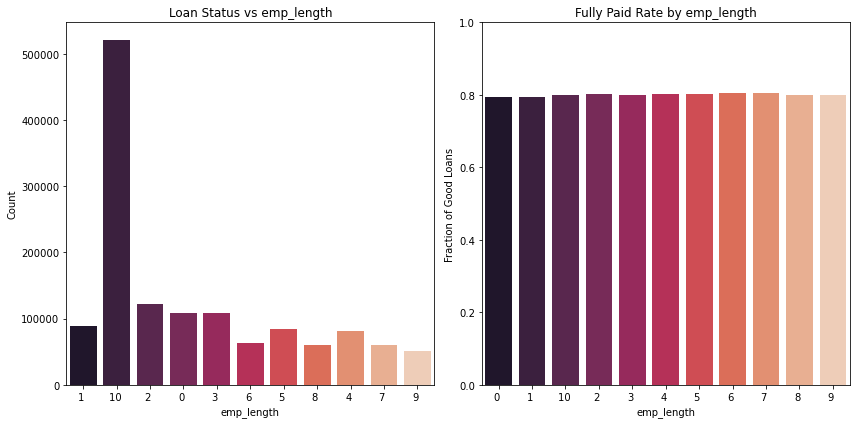

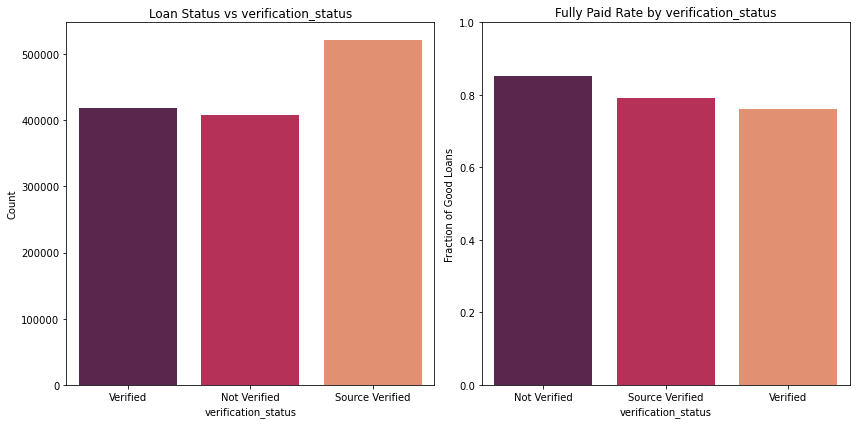

In [38]:
for v in ordinal_var:
    categorical_plot(v)

C:\Users\Chait\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Chait\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Chait\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


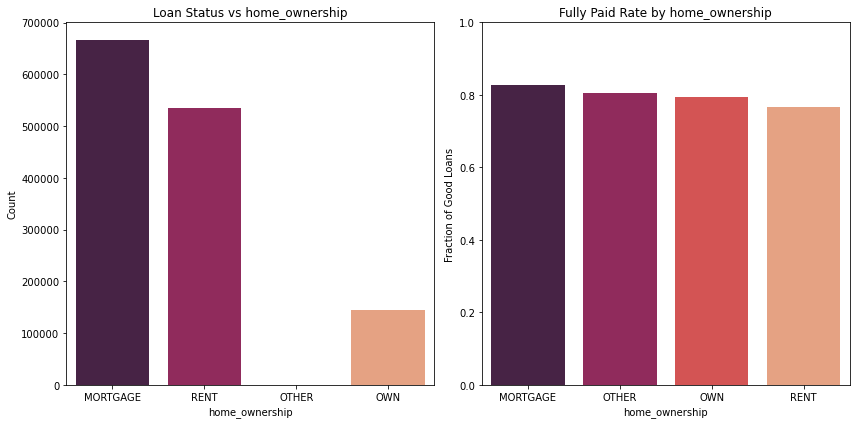

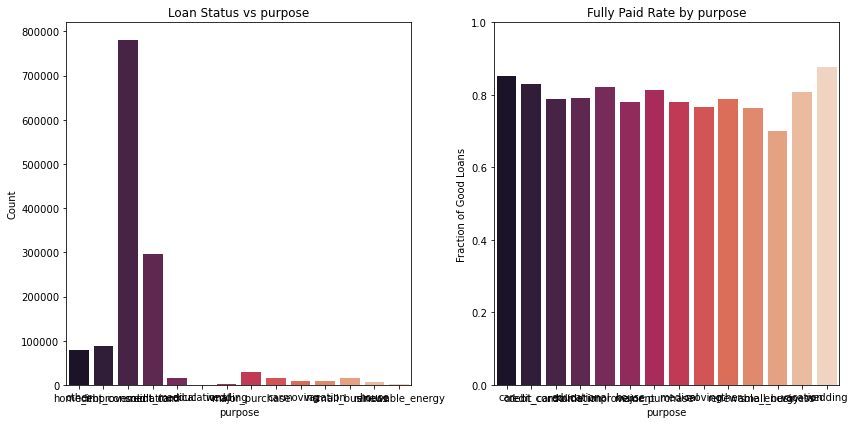

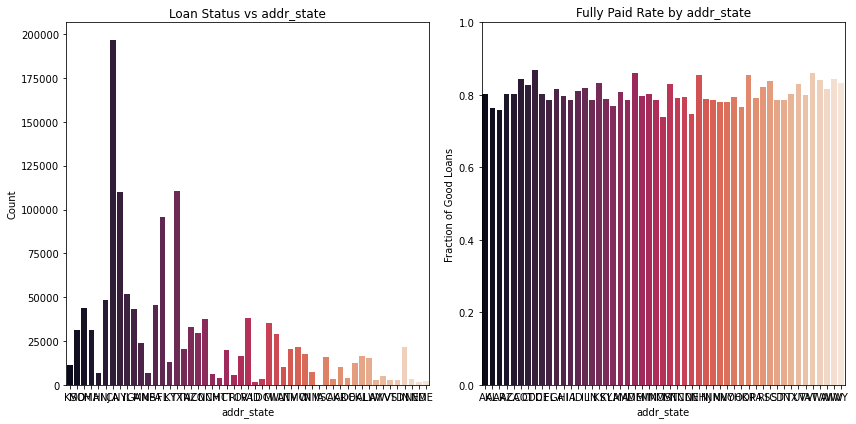

In [39]:
# nominal_var = ['home_ownership','purpose', 'title', 'zip_code', 'addr_state']

categorical_plot('home_ownership')
categorical_plot('purpose')
# categorical_plot('title')
categorical_plot('addr_state')

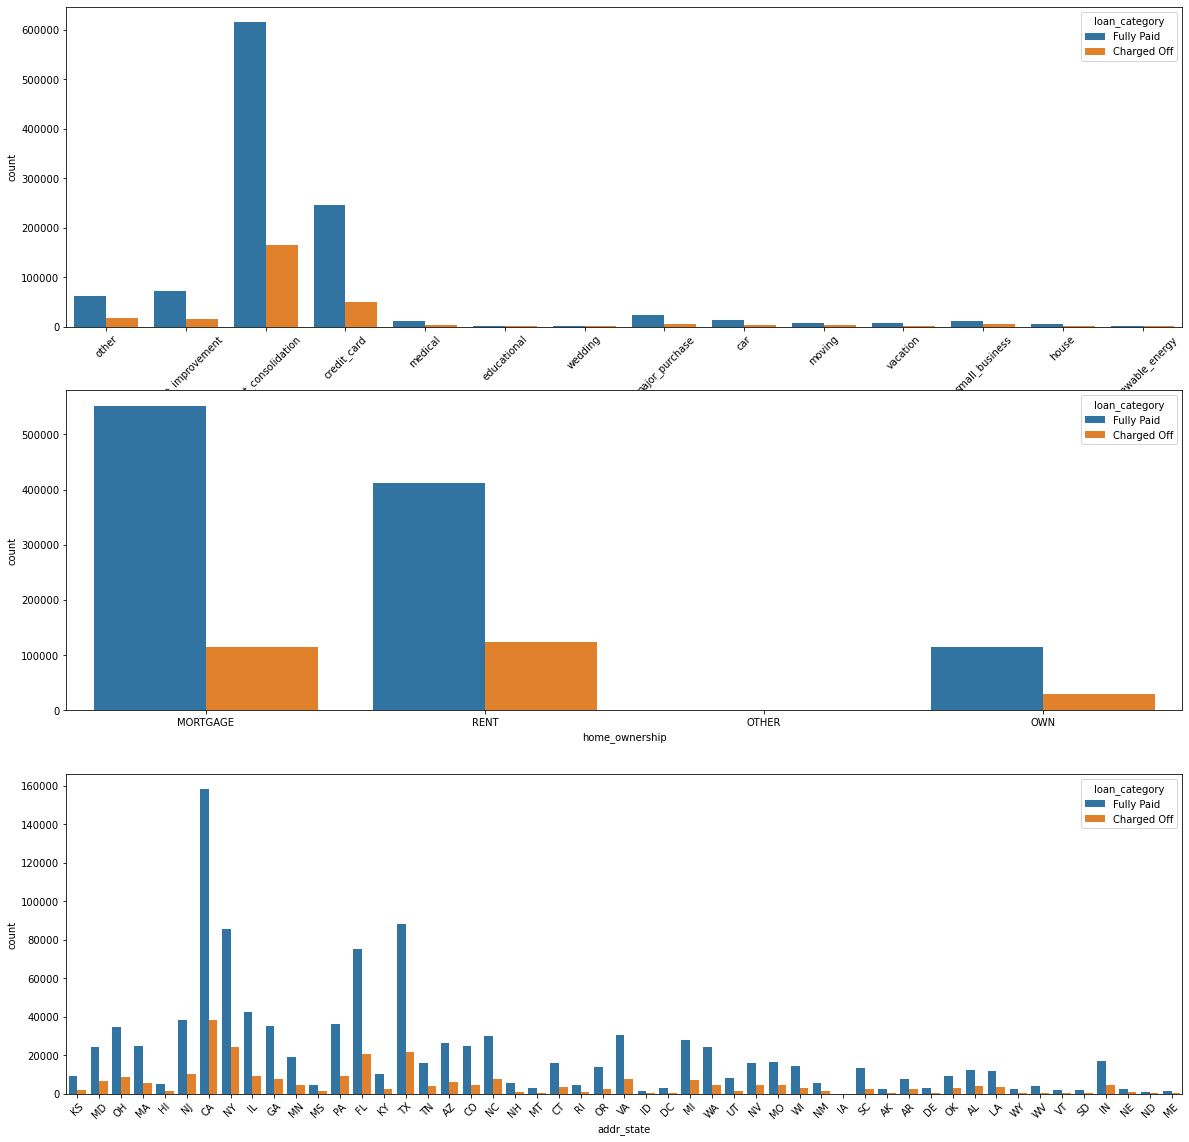

In [197]:
plt.figure(figsize=(20, 20))
plt.subplot(3, 1, 1)
purpose = sns.countplot(x='purpose', data=a_lc, hue='loan_category')
purpose.set_xticklabels(purpose.get_xticklabels(), rotation=45);

plt.subplot(3, 1, 2)
sns.countplot(x='home_ownership', data=a_lc, hue='loan_category')

plt.subplot(3, 1, 3)
state = sns.countplot(x='addr_state', data=a_lc, hue='loan_category')
state.set_xticklabels(state.get_xticklabels(), rotation=45);

# sns.countplot(x='title', data=a_lc, hue='loan_category')




### Data Cleaning

In [41]:
a_lc.issue_d

1653655    Apr-2008
1650776    Apr-2008
1650777    Apr-2008
1650778    Apr-2008
1650779    Apr-2008
             ...   
764308     Sep-2018
764315     Sep-2018
764343     Sep-2018
764796     Sep-2018
782520     Sep-2018
Name: issue_d, Length: 1348099, dtype: object

In [198]:
import datetime as dt
def make_dateval(s):
    return dt.datetime.strptime(s[-4:]+s[:3]+'01', '%Y%b%d')
a_lc.issue_d = a_lc.issue_d.apply(make_dateval)
a_lc.earliest_cr_line = a_lc.earliest_cr_line.apply(make_dateval)
a_lc['year'] = a_lc.issue_d.apply(lambda x: x.year)
a_lc['cred_year'] = a_lc.earliest_cr_line.apply(lambda x: x.year)
a_lc['cred_length'] = a_lc['year'] - a_lc['cred_year']


In [43]:
a_lc.issue_d

1653655   2008-04-01
1650776   2008-04-01
1650777   2008-04-01
1650778   2008-04-01
1650779   2008-04-01
             ...    
764308    2018-09-01
764315    2018-09-01
764343    2018-09-01
764796    2018-09-01
782520    2018-09-01
Name: issue_d, Length: 1348099, dtype: datetime64[ns]

In [44]:
# a_lc.earliest_cr_line = a_lc.earliest_cr_line.apply(make_dateval)
# a_lc.earliest_cr_line

In [45]:
# a_lc['cred_year'] = a_lc.earliest_cr_line.apply(lambda x: x.year)

In [46]:
# a_lc['cred_length'] = a_lc['year'] - a_lc['cred_year']
# a_lc['cred_length']

In [199]:
yearly_count = a_lc.groupby('year')['loan_category'].count().reset_index()
yearly_count = yearly_count.rename(columns={'loan_category': 'counts'})
yearly_count['ratio'] = yearly_count['counts'] / len(a_lc)
yearly_count

,year,counts,ratio
0,2007,603,0.000447
1,2008,2393,0.001775
2,2009,5281,0.003917
3,2010,12537,0.009300
4,2011,21721,0.016112
5,2012,53367,0.039587
6,2013,134804,0.099996
7,2014,223103,0.165495
8,2015,375546,0.278574
9,2016,293105,0.217421


Text(0, 0.5, 'Ratio')

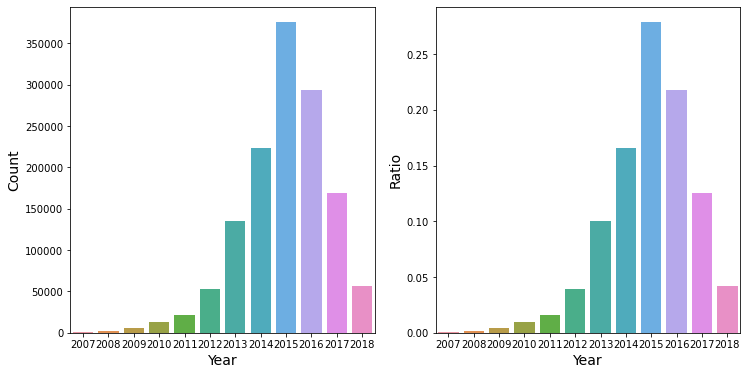

In [200]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='year', data=a_lc, ax=ax1)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)


sns.barplot(x='year', y = 'ratio', data=yearly_count, ax=ax2)
ax2.set_xlabel('Year', fontsize=14)
ax2.set_ylabel('Ratio', fontsize=14)

# plt.show()

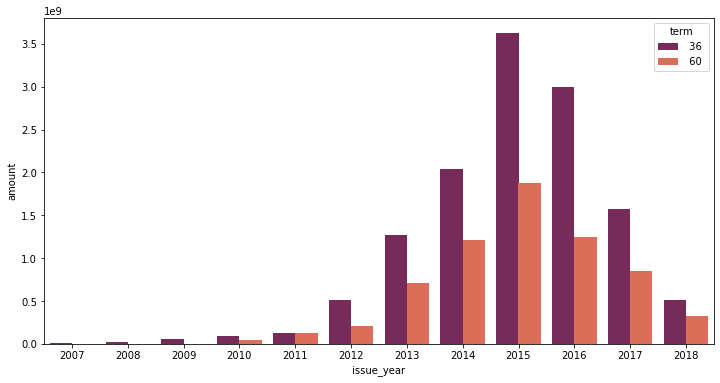

In [201]:
# Plot for Issue year vs Loan Amount
# making issue date as date time

a_lc['issue_d'] = pd.to_datetime(a_lc['issue_d'])
a_lc = a_lc[pd.notnull(a_lc['issue_d'])]
a_lc['issue_year'] = a_lc['issue_d'].dt.year
yamnt = pd.DataFrame({'amount' : a_lc.groupby(['issue_year', 'term']).sum()['loan_amnt']}).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x="issue_year", y="amount",
             hue="term", palette="rocket", linewidth=2.5,
             data=yamnt)

Text(0.5, 1.0, 'Interest Rate Distribuition')

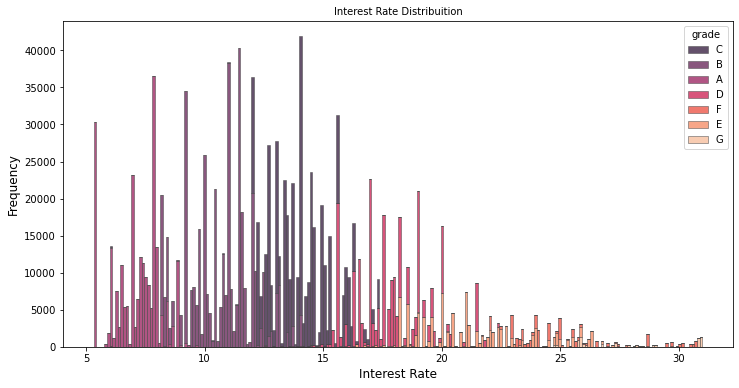

In [202]:
# Frequency distribution of Interest Rate
plt.figure(figsize=(12,6))
g = sns.histplot(a_lc, x="int_rate",hue='grade',
    multiple="stack",
    palette="rocket",
    edgecolor=".3",linewidth=.5
    )
g.set_xlabel("Interest Rate", fontsize=12)
g.set_ylabel("Frequency", fontsize=12)
g.set_title("Interest Rate Distribuition", fontsize=10)

In [203]:
# Creating target feature loan_class to check Good and Bad Loan. Good is 1 and bad is 0
a_lc["loan_class"] = np.where((a_lc.loan_category == 'Fully Paid'), 1, 0)

In [204]:
a_lc.loan_class.value_counts()

1    1078739
0     269360
Name: loan_class, dtype: int64

In [205]:
a_lc.sample(5)

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,tot_coll_amt,tot_cur_bal,inq_fi,avg_cur_bal,mort_acc,pub_rec_bankruptcies,total_bal_ex_mort,loan_category,year,cred_year,cred_length,issue_year,loan_class
1151887,33210592,15000.0,36,12.49,501.74,B,B5,6,RENT,116600.00,Not Verified,2014-10-01,Fully Paid,debt_consolidation,Debt consolidation,300xx,GA,8.43,2.0,2004-02-01,665.0,669.0,1.0,7.0,0.0,23661.0,88.0,20.0,0.0,23661.0,0.0,3380.0,3.0,0.0,23661.0,Fully Paid,2014,2004,10,2014,1
1292228,14599603,21000.0,36,9.67,674.37,B,B1,2,MORTGAGE,120000.00,Not Verified,2014-04-01,Fully Paid,debt_consolidation,Debt consolidation,925xx,CA,21.52,0.0,2005-10-01,690.0,694.0,0.0,18.0,0.0,27410.0,80.6,25.0,0.0,369403.0,0.0,20522.0,2.0,0.0,93393.0,Fully Paid,2014,2005,9,2014,1
1592258,131386730,2800.0,36,7.96,87.70,A,A5,0,RENT,52000.00,Source Verified,2018-04-01,Fully Paid,vacation,Vacation,902xx,CA,1.39,0.0,2007-12-01,755.0,759.0,0.0,10.0,0.0,1177.0,3.7,18.0,0.0,1177.0,4.0,118.0,0.0,0.0,1177.0,Fully Paid,2018,2007,11,2018,1
480454,128234217,40000.0,60,12.62,902.37,C,C1,6,MORTGAGE,96499.53,Source Verified,2018-02-01,Charged Off,home_improvement,Home improvement,852xx,AZ,4.96,0.0,2006-04-01,695.0,699.0,0.0,5.0,1.0,549.0,22.0,15.0,0.0,6895.0,0.0,1379.0,0.0,1.0,6895.0,Charged Off,2018,2006,12,2018,0
353164,42344834,14000.0,36,6.39,428.39,A,A2,2,RENT,70000.00,Source Verified,2015-03-01,Fully Paid,debt_consolidation,Debt consolidation,857xx,AZ,25.32,0.0,1999-10-01,735.0,739.0,0.0,14.0,0.0,2435.0,8.0,19.0,0.0,38727.0,0.0,2766.0,1.0,0.0,38727.0,Fully Paid,2015,1999,16,2015,1


In [206]:
print([column for column in a_lc.columns if a_lc[column].dtype == 'object'])

['id', 'term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'loan_category']


In [207]:
# Remove these columns based on data analysis
a_lc.drop(['grade','issue_d', 'loan_status', 'loan_category', 'zip_code', 'earliest_cr_line', 'cred_year', 'title'], axis=1, inplace=True)

In [124]:
# a_lc.drop(['earliest_cr_line','year', 'cred_year'], axis =1, inplace=True)

In [208]:
a_lc

,id,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,tot_coll_amt,tot_cur_bal,inq_fi,avg_cur_bal,mort_acc,pub_rec_bankruptcies,total_bal_ex_mort,year,cred_length,issue_year,loan_class
1653655,304384,20000.0,36,11.97,664.00,C4,1,MORTGAGE,90012.0,Verified,other,KS,18.96,0.0,705.0,709.0,7.0,17.0,0.0,17212.0,39.7,31.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,2008,7,2008,1
1650776,317597,4500.0,36,11.97,149.40,C4,10,MORTGAGE,115200.0,Not Verified,home_improvement,MD,15.49,1.0,670.0,674.0,1.0,10.0,0.0,22625.0,86.4,30.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,2008,14,2008,1
1650777,320231,10000.0,36,10.08,323.05,B3,2,RENT,35665.0,Not Verified,debt_consolidation,OH,21.57,0.0,745.0,749.0,0.0,17.0,0.0,16973.0,26.4,20.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,2008,14,2008,1
1650778,319964,5700.0,36,10.39,184.97,B4,1,RENT,36000.0,Not Verified,debt_consolidation,MA,9.57,0.0,695.0,699.0,0.0,8.0,0.0,6342.0,74.4,15.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,2008,7,2008,1
1650779,319299,4075.0,36,8.32,128.30,A4,0,RENT,19200.0,Not Verified,debt_consolidation,HI,1.25,0.0,740.0,744.0,0.0,4.0,0.0,296.0,2.0,5.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,2008,6,2008,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764308,140621163,5000.0,36,14.47,172.04,C2,10,RENT,48690.0,Source Verified,credit_card,FL,23.15,0.0,715.0,719.0,1.0,6.0,0.0,3874.0,55.3,19.0,0.0,21522.0,4.0,3587.0,0.0,0.0,21522.0,2018,9,2018,1
764315,140599114,14000.0,60,10.47,300.71,B2,9,RENT,39000.0,Verified,debt_consolidation,MS,18.52,0.0,760.0,764.0,0.0,4.0,0.0,1251.0,22.7,11.0,0.0,13496.0,0.0,3374.0,0.0,0.0,13496.0,2018,8,2018,1
764343,140557518,35000.0,36,12.73,1174.75,B5,10,MORTGAGE,130000.0,Verified,debt_consolidation,NY,10.36,1.0,690.0,694.0,0.0,4.0,0.0,11258.0,86.6,21.0,0.0,344348.0,0.0,86087.0,4.0,0.0,17934.0,2018,19,2018,1
764796,140579566,20000.0,36,6.67,614.53,A2,10,MORTGAGE,300000.0,Not Verified,debt_consolidation,MD,4.87,0.0,750.0,754.0,1.0,10.0,0.0,35515.0,39.9,33.0,0.0,387816.0,1.0,38782.0,2.0,0.0,54917.0,2018,16,2018,1


In [61]:
# a_lc[['term', 'emp_length']] = a_lc[['term', 'emp_length']].apply(pd.to_numeric)?

In [209]:
state_count = a_lc.groupby(['addr_state']).count().reset_index()
state_count = state_count[['addr_state','loan_class']]
state_count.rename(columns={'loan_class': 'counts'})

unique_count = a_lc.groupby(['addr_state','loan_class']).count().reset_index()
unique_count = unique_count[['addr_state','loan_class', 'id']]
m = pd.merge(unique_count, state_count, on="addr_state", how = "left")
m.rename(columns={'loan_class_y': 'total'})

m

,addr_state,loan_class_x,id,loan_class_y
0,AK,0,628,3195
1,AK,1,2567,3195
2,AL,0,3934,16645
3,AL,1,12711,16645
4,AR,0,2426,10062
5,AR,1,7636,10062
6,AZ,0,6438,32748
7,AZ,1,26310,32748
8,CA,0,38642,196853
9,CA,1,158211,196853


In [210]:
m['ratio'] = m['id']/m['loan_class_y']
m = m[['addr_state', 'loan_class_x', 'ratio']]
m.set_index('addr_state')

,loan_class_x,ratio
addr_state,,
AK,0,0.196557
AK,1,0.803443
AL,0,0.236347
AL,1,0.763653
AR,0,0.241105
AR,1,0.758895
AZ,0,0.196592
AZ,1,0.803408
CA,0,0.196299


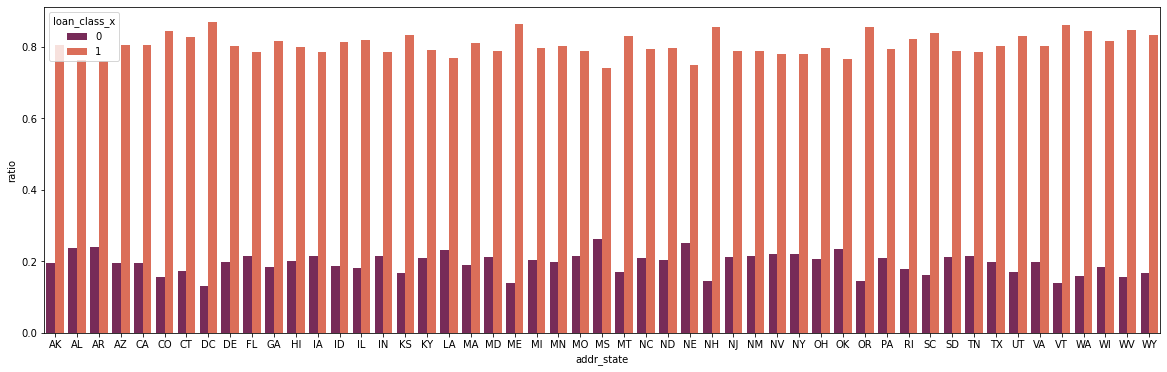

In [128]:
plt.figure(figsize=(20,6))
sns.barplot(x="addr_state", y="ratio",
             hue="loan_class_x", palette="rocket", linewidth=2.5,
             data=m) #drop state

### Encoding

In [211]:
print([column for column in a_lc.columns if a_lc[column].dtype == 'object'])

['id', 'term', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'addr_state']


In [212]:
a_lc.drop(['id','addr_state'], axis =1, inplace=True)

In [213]:
sub_grades = sorted(a_lc.sub_grade.unique())
grades = dict((i,j) for i,j in enumerate(sub_grades, start=1))
grades = {grades[k]:k for k in grades}

# sub_grades_dict = {x:sub_grades.index(x)+1 for x in sub_grades} 
# sub_grades_dict

In [214]:
a_lc['sub_grade'] = a_lc['sub_grade'].map(grades)

In [215]:
verification_status = {'Not Verified':0, 'Source Verified':1, 'Verified':2}
a_lc['verification_status'] = a_lc['verification_status'].map(verification_status)


In [134]:
a_lc

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,tot_coll_amt,tot_cur_bal,inq_fi,avg_cur_bal,mort_acc,pub_rec_bankruptcies,total_bal_ex_mort,year,cred_length,issue_year,loan_class
1653655,20000.0,36,11.97,664.00,14,1,MORTGAGE,90012.0,2,other,18.96,0.0,705.0,709.0,7.0,17.0,0.0,17212.0,39.7,31.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,2008,7,2008,1
1650776,4500.0,36,11.97,149.40,14,10,MORTGAGE,115200.0,0,home_improvement,15.49,1.0,670.0,674.0,1.0,10.0,0.0,22625.0,86.4,30.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,2008,14,2008,1
1650777,10000.0,36,10.08,323.05,8,2,RENT,35665.0,0,debt_consolidation,21.57,0.0,745.0,749.0,0.0,17.0,0.0,16973.0,26.4,20.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,2008,14,2008,1
1650778,5700.0,36,10.39,184.97,9,1,RENT,36000.0,0,debt_consolidation,9.57,0.0,695.0,699.0,0.0,8.0,0.0,6342.0,74.4,15.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,2008,7,2008,1
1650779,4075.0,36,8.32,128.30,4,0,RENT,19200.0,0,debt_consolidation,1.25,0.0,740.0,744.0,0.0,4.0,0.0,296.0,2.0,5.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,2008,6,2008,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764308,5000.0,36,14.47,172.04,12,10,RENT,48690.0,1,credit_card,23.15,0.0,715.0,719.0,1.0,6.0,0.0,3874.0,55.3,19.0,0.0,21522.0,4.0,3587.0,0.0,0.0,21522.0,2018,9,2018,1
764315,14000.0,60,10.47,300.71,7,9,RENT,39000.0,2,debt_consolidation,18.52,0.0,760.0,764.0,0.0,4.0,0.0,1251.0,22.7,11.0,0.0,13496.0,0.0,3374.0,0.0,0.0,13496.0,2018,8,2018,1
764343,35000.0,36,12.73,1174.75,10,10,MORTGAGE,130000.0,2,debt_consolidation,10.36,1.0,690.0,694.0,0.0,4.0,0.0,11258.0,86.6,21.0,0.0,344348.0,0.0,86087.0,4.0,0.0,17934.0,2018,19,2018,1
764796,20000.0,36,6.67,614.53,2,10,MORTGAGE,300000.0,0,debt_consolidation,4.87,0.0,750.0,754.0,1.0,10.0,0.0,35515.0,39.9,33.0,0.0,387816.0,1.0,38782.0,2.0,0.0,54917.0,2018,16,2018,1


In [216]:
# Dummy variable created for the following features
categorical = ['home_ownership', 'purpose']
a_lc =pd.get_dummies(a_lc, columns=categorical, drop_first=True)


In [217]:
a_lc

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,verification_status,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,tot_coll_amt,tot_cur_bal,inq_fi,avg_cur_bal,mort_acc,pub_rec_bankruptcies,total_bal_ex_mort,year,cred_length,issue_year,loan_class,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
1653655,20000.0,36,11.97,664.00,14,1,90012.0,2,18.96,0.0,705.0,709.0,7.0,17.0,0.0,17212.0,39.7,31.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,2008,7,2008,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1650776,4500.0,36,11.97,149.40,14,10,115200.0,0,15.49,1.0,670.0,674.0,1.0,10.0,0.0,22625.0,86.4,30.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,2008,14,2008,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1650777,10000.0,36,10.08,323.05,8,2,35665.0,0,21.57,0.0,745.0,749.0,0.0,17.0,0.0,16973.0,26.4,20.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,2008,14,2008,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1650778,5700.0,36,10.39,184.97,9,1,36000.0,0,9.57,0.0,695.0,699.0,0.0,8.0,0.0,6342.0,74.4,15.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,2008,7,2008,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1650779,4075.0,36,8.32,128.30,4,0,19200.0,0,1.25,0.0,740.0,744.0,0.0,4.0,0.0,296.0,2.0,5.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,2008,6,2008,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764308,5000.0,36,14.47,172.04,12,10,48690.0,1,23.15,0.0,715.0,719.0,1.0,6.0,0.0,3874.0,55.3,19.0,0.0,21522.0,4.0,3587.0,0.0,0.0,21522.0,2018,9,2018,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
764315,14000.0,60,10.47,300.71,7,9,39000.0,2,18.52,0.0,760.0,764.0,0.0,4.0,0.0,1251.0,22.7,11.0,0.0,13496.0,0.0,3374.0,0.0,0.0,13496.0,2018,8,2018,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
764343,35000.0,36,12.73,1174.75,10,10,130000.0,2,10.36,1.0,690.0,694.0,0.0,4.0,0.0,11258.0,86.6,21.0,0.0,344348.0,0.0,86087.0,4.0,0.0,17934.0,2018,19,2018,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
764796,20000.0,36,6.67,614.53,2,10,300000.0,0,4.87,0.0,750.0,754.0,1.0,10.0,0.0,35515.0,39.9,33.0,0.0,387816.0,1.0,38782.0,2.0,0.0,54917.0,2018,16,2018,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [73]:
# # split into train and test set
# train = a_lc[a_lc['year'] < 2017]
# test = a_lc[a_lc['year'] >= 2017]

In [74]:
# train.to_csv('./train.csv', index=False)
# test.to_csv('./test.csv', index=False)

# print('Training set: ', train.shape, round(len(train) / len(a_lc), 4))
# print('Test set: ', test.shape, round(len(test) / len(a_lc), 4))

In [137]:
corrMatrix = a_lc.corr()
corrMatrix["loan_class"].sort_values(ascending=False)


loan_class                    1.000000
fico_range_low                0.130701
fico_range_high               0.130700
avg_cur_bal                   0.074761
mort_acc                      0.069538
tot_cur_bal                   0.067138
annual_inc                    0.041727
purpose_credit_card           0.040401
cred_length                   0.033525
revol_bal                     0.019648
purpose_home_improvement      0.014676
total_acc                     0.011410
purpose_wedding               0.007896
purpose_major_purchase        0.005148
total_bal_ex_mort             0.002608
purpose_vacation              0.001611
tot_coll_amt                  0.000309
home_ownership_OTHER          0.000198
purpose_educational          -0.000365
purpose_renewable_energy     -0.002464
purpose_house                -0.003560
purpose_medical              -0.005049
home_ownership_OWN           -0.005649
purpose_other                -0.006844
purpose_moving               -0.007212
delinq_2yrs              

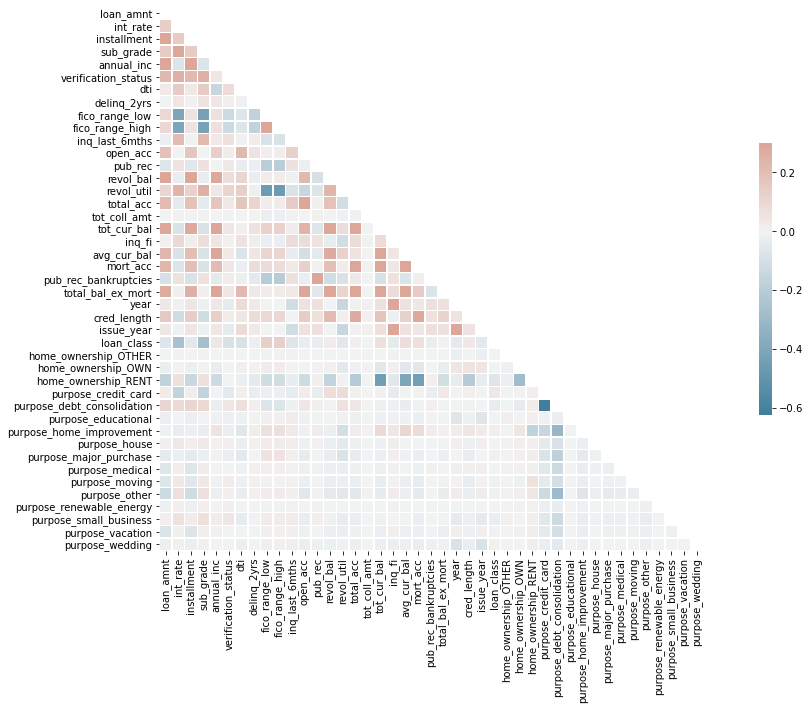

In [138]:
#highest_corr_features = corrMatrix.index[abs(corrMatrix["loan_category"])>0.]
plt.figure(figsize=(20,10))
# Draw the heatmap with the mask and correct aspect ratio
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corrMatrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#ignore

## Machine Learning :

In [218]:
# split into train and test set
train = a_lc[a_lc['year'] < 2017]
test = a_lc[a_lc['year'] >= 2017]

C:\Users\Chait\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency')

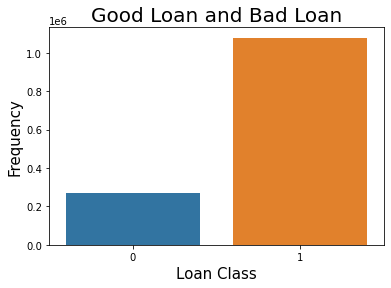

In [219]:
# Countplot of Good Loans and Bad Loans
g= sns.countplot(a_lc["loan_class"])
g.set_xticklabels(g.get_xticklabels(),rotation=0)
g.set_title("Good Loan and Bad Loan", fontsize=20)
g.set_xlabel("Loan Class", fontsize=15)
g.set_ylabel("Frequency", fontsize=15)

In [220]:
# split the data into training and testing
from sklearn.model_selection import train_test_split
X_train = train.loc[:, train.columns != "loan_class"]
Y_train = train["loan_class"]

X_test = test.loc[:, test.columns != "loan_class"]
Y_test = test["loan_class"]

In [221]:
#Check the shape
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((1122460, 44), (1122460,), (225639, 44), (225639,))

In [222]:
X_train

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,verification_status,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,tot_coll_amt,tot_cur_bal,inq_fi,avg_cur_bal,mort_acc,pub_rec_bankruptcies,total_bal_ex_mort,year,cred_length,issue_year,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
1653655,20000.0,36,11.97,664.00,14,1,90012.0,2,18.96,0.0,705.0,709.0,7.0,17.0,0.0,17212.0,39.7,31.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,2008,7,2008,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1650776,4500.0,36,11.97,149.40,14,10,115200.0,0,15.49,1.0,670.0,674.0,1.0,10.0,0.0,22625.0,86.4,30.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,2008,14,2008,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1650777,10000.0,36,10.08,323.05,8,2,35665.0,0,21.57,0.0,745.0,749.0,0.0,17.0,0.0,16973.0,26.4,20.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,2008,14,2008,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1650778,5700.0,36,10.39,184.97,9,1,36000.0,0,9.57,0.0,695.0,699.0,0.0,8.0,0.0,6342.0,74.4,15.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,2008,7,2008,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1650779,4075.0,36,8.32,128.30,4,0,19200.0,0,1.25,0.0,740.0,744.0,0.0,4.0,0.0,296.0,2.0,5.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,2008,6,2008,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960543,16100.0,60,12.79,364.60,11,10,140000.0,1,14.30,0.0,800.0,804.0,1.0,10.0,0.0,7183.0,17.4,23.0,0.0,291727.0,1.0,32414.0,3.0,0.0,65496.0,2016,43,2016,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1960539,30000.0,60,24.49,871.60,23,10,70000.0,2,28.94,0.0,665.0,669.0,1.0,23.0,1.0,23770.0,73.4,46.0,0.0,117060.0,0.0,5574.0,1.0,1.0,117060.0,2016,26,2016,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1960538,12000.0,60,17.99,304.66,17,10,42000.0,1,24.43,0.0,665.0,669.0,1.0,4.0,0.0,6826.0,71.1,11.0,0.0,42912.0,2.0,10728.0,0.0,0.0,42912.0,2016,11,2016,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1960541,30000.0,36,12.79,1007.79,11,8,175000.0,2,21.19,0.0,680.0,684.0,1.0,21.0,0.0,84484.0,89.9,42.0,0.0,364318.0,0.0,17348.0,4.0,0.0,141531.0,2016,37,2016,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [223]:
# scaling the dataset
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [226]:
# Applying Logistic Regression
log= LogisticRegression()
log.fit(X_train, Y_train)

Y_pred= log.predict(X_test)

# Summary of the prediction
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

# Accuracy
print("Accuracy of the model is: ", accuracy_score(Y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.46      0.15      0.23     48043
           1       0.81      0.95      0.87    177596

    accuracy                           0.78    225639
   macro avg       0.63      0.55      0.55    225639
weighted avg       0.73      0.78      0.74    225639

[[  7203  40840]
 [  8462 169134]]
Accuracy of the model is:  0.7815005384707431


In [243]:
# from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

print("Before OverSampling, counts of label '1': {}".format(sum(Y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train==0)))

# Over Sampling
ros = RandomOverSampler(sampling_strategy='minority')
X_train_res, Y_train_res = ros.fit_resample(X_train, Y_train.ravel())

print("After OverSampling, counts of label '1': {}".format(sum(Y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_res==0)))

Before OverSampling, counts of label '1': 901143
Before OverSampling, counts of label '0': 221317 

After OverSampling, counts of label '1': 901143
After OverSampling, counts of label '0': 901143


In [237]:
# Applying Logistic Regression on oversample data
log= LogisticRegression()
log.fit(X_train_res, Y_train_res)

Y_pred= log.predict(X_test)

# Summary of the prediction
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

# Accuracy
print("Accuracy of the model is: ", accuracy_score(Y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.30      0.77      0.43     48043
           1       0.89      0.51      0.65    177596

    accuracy                           0.57    225639
   macro avg       0.60      0.64      0.54    225639
weighted avg       0.77      0.57      0.60    225639

[[36942 11101]
 [86580 91016]]
Accuracy of the model is:  0.5670916818457802


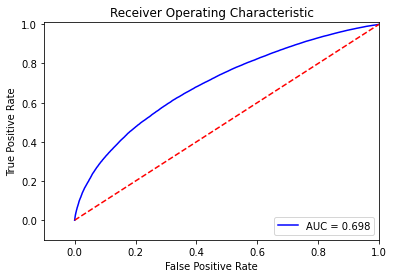

In [238]:
# ROC-AUC for logistic oversampled classification
tmp = log.fit(X_train_res, Y_train_res.ravel())
Y_pred_resample = tmp.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_resample)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [227]:
# Apply XGBoosting model on train data
import xgboost as xgb
xg = xgb.XGBClassifier()

n_estimators = 100
xg.set_params(max_depth=4, n_estimators=n_estimators)
train_r2 = []

steps = range(100,1000,10)

xg.fit(X_train,Y_train)
Y_pred = xg.predict(X_test)

# Summary of the prediction
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

# Accuracy
print("Accuracy of the model is: ", accuracy_score(Y_pred,Y_test))

C:\Users\Chait\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:41:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.52      0.12      0.20     48043
           1       0.80      0.97      0.88    177596

    accuracy                           0.79    225639
   macro avg       0.66      0.55      0.54    225639
weighted avg       0.74      0.79      0.73    225639

[[  5827  42216]
 [  5351 172245]]
Accuracy of the model is:  0.7891898120449036


In [239]:
# Apply XGBoosting model on oversampling train data
import xgboost as xgb
xg = xgb.XGBClassifier()

n_estimators = 100
xg.set_params(max_depth=4, n_estimators=n_estimators)
train_r2 = []

steps = range(100,1000,10)

xg.fit(X_train_res,Y_train_res)
Y_pred = xg.predict(X_test)

# Summary of the prediction
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

# Accuracy
print("Accuracy of the model is: ", accuracy_score(Y_pred,Y_test))

C:\Users\Chait\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:04:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.31      0.77      0.44     48043
           1       0.90      0.54      0.67    177596

    accuracy                           0.59    225639
   macro avg       0.60      0.65      0.56    225639
weighted avg       0.77      0.59      0.62    225639

[[36885 11158]
 [82437 95159]]
Accuracy of the model is:  0.5852002535022758


C:\Users\Chait\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:23:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


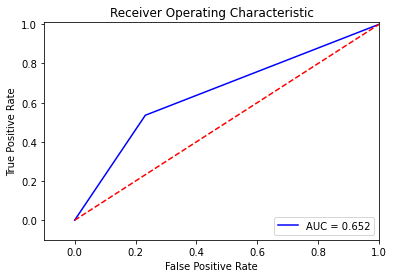

In [242]:
# ROC-AUC for XGBoost oversampled classification
tmp = xg.fit(X_train_res, Y_train_res)
Y_pred_resample = tmp.predict(X_test)


fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_resample)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Naive Bayes
naive= GaussianNB()
naive.fit(X_train, Y_train)

Y_pred= naive.predict(X_test)

# Summary of prediction
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

# Accuracy score
print("Accuracy of the model is: ", accuracy_score(Y_pred,Y_test))

In [ ]:
# Naive Bayes oversampling
naive= GaussianNB()
naive.fit(X_train_res, Y_train_res)

Y_pred= naive.predict(X_test)

# Summary of prediction
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

# Accuracy score
print("Accuracy of the model is: ", accuracy_score(Y_pred,Y_test))

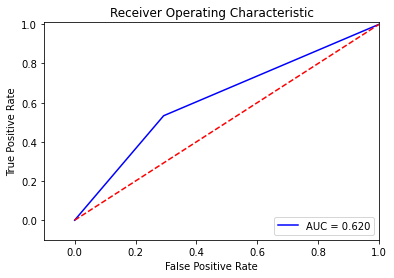

In [235]:
# ROC-AUC for Naive Bayes classification

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [256]:
# Apply Neural Network algorithm

import tensorflow.python.keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.metrics import categorical_accuracy
from tensorflow.python.keras.layers import Dense, Activation,Dropout
#from tensorflow.python.keras.optimizers import SGD

input_nodes = X_train.shape[1]
output_nodes = 1

model = Sequential()
#model.add(Input((input_nodes,)))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3, seed=0))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.3, seed=1))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.3, seed=2))
model.add(Dense(output_nodes))
model.compile(optimizer="adam", loss="mean_squared_logarithmic_error")
    
model.fit(X_train, Y_train, batch_size=10, epochs=100, verbose=1)

Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, np.argmax(Y_pred, axis=1))
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))

print('Classification Report:')
print(classification_report(Y_test, np.argmax(Y_pred, axis=1)))
print('Confusion Matrix:')
print(confusion_matrix(Y_test, np.argmax(Y_pred, axis=1)))
print('')

Epoch 1/100
112246/112246 [==============================] - 177s 2ms/step - loss: 0.0725
Epoch 2/100
112246/112246 [==============================] - 167s 1ms/step - loss: 0.0700
Epoch 3/100
112246/112246 [==============================] - 167s 1ms/step - loss: 0.0702
Epoch 4/100
112246/112246 [==============================] - 168s 1ms/step - loss: 0.0704
Epoch 5/100
112246/112246 [==============================] - 177s 2ms/step - loss: 0.0702
Epoch 6/100
112246/112246 [==============================] - 172s 2ms/step - loss: 0.0701
Epoch 7/100
112246/112246 [==============================] - 181s 2ms/step - loss: 0.0707
Epoch 8/100
112246/112246 [==============================] - 166s 1ms/step - loss: 0.0705
Epoch 9/100
112246/112246 [==============================] - 163s 1ms/step - loss: 0.0704
Epoch 10/100
112246/112246 [==============================] - 164s 1ms/step - loss: 0.0704
Epoch 11/100
112246/112246 [==============================] - 164s 1ms/step - loss: 0.0705
Epoch 12

112246/112246 [==============================] - 154s 1ms/step - loss: 0.0740
Epoch 91/100
112246/112246 [==============================] - 154s 1ms/step - loss: 0.0736
Epoch 92/100
112246/112246 [==============================] - 154s 1ms/step - loss: 0.0736
Epoch 93/100
112246/112246 [==============================] - 154s 1ms/step - loss: 0.0735
Epoch 94/100
112246/112246 [==============================] - 154s 1ms/step - loss: 0.0734
Epoch 95/100
112246/112246 [==============================] - 155s 1ms/step - loss: 0.0737
Epoch 96/100
112246/112246 [==============================] - 154s 1ms/step - loss: 0.0739
Epoch 97/100
112246/112246 [==============================] - 154s 1ms/step - loss: 0.0741 0s - 
Epoch 98/100
112246/112246 [==============================] - 155s 1ms/step - loss: 0.0739
Epoch 99/100
112246/112246 [==============================] - 155s 1ms/step - loss: 0.0741
Epoch 100/100
112246/112246 [==============================] - 167s 1ms/step - loss: 0.0741


NameError: name 'sklearn' is not defined

In [265]:
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, np.argmax(Y_pred, axis=1))
print(classification_report(Y_test, np.argmax(Y_pred, axis=1)))
print(confusion_matrix(Y_test, np.argmax(Y_pred, axis=1)))

C:\Users\Chait\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chait\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chait\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.21      1.00      0.35     48043
           1       0.00      0.00      0.00    177596

    accuracy                           0.21    225639
   macro avg       0.11      0.50      0.18    225639
weighted avg       0.05      0.21      0.07    225639

[[ 48043      0]
 [177596      0]]


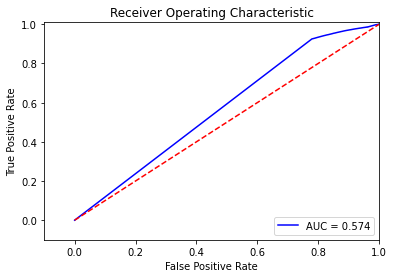

In [266]:
# ROC-AUC for Neural Network 

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [271]:
# Save the model (Make sure that the folder exists)
model.save('NN\\cm_1')


INFO:tensorflow:Assets written to: NN\cm_1\assets


In [ ]:
#pip install imbalanced-learn